In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

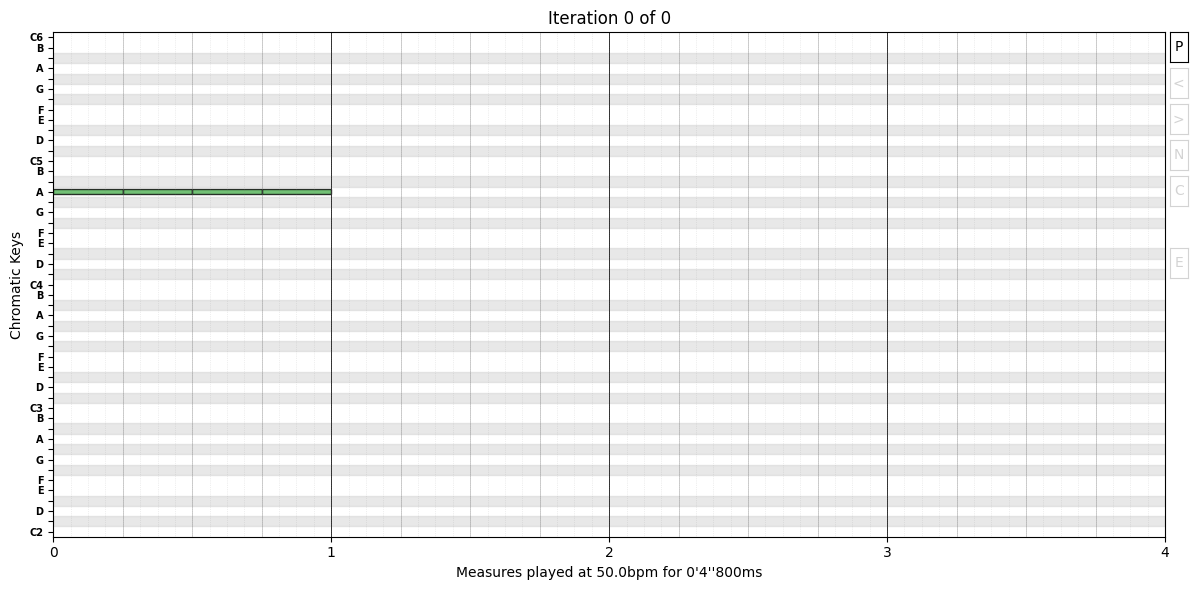

In [2]:
settings << Tempo(50) << Minor()   # Minor will mean the A as the default Tonic Key !
treble_melody = Note() / 4
treble_melody >> Plot()

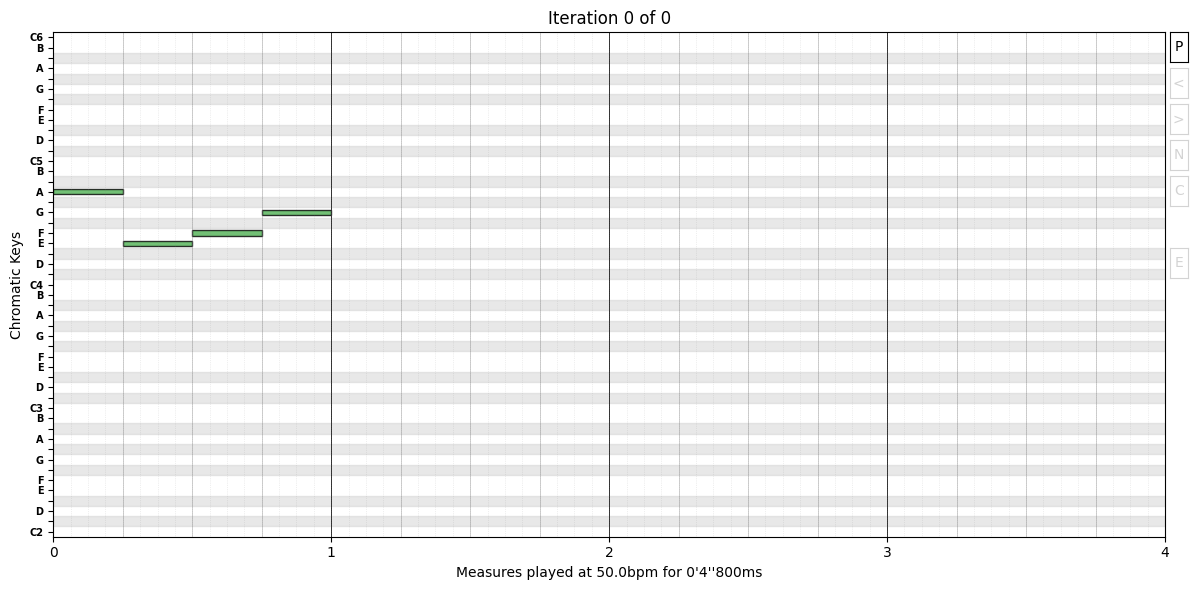

In [3]:
# Sets the Root Note for each Beat
treble_melody << Foreach("A", "E", "F", "G")**RootKey()
treble_melody >> Plot()

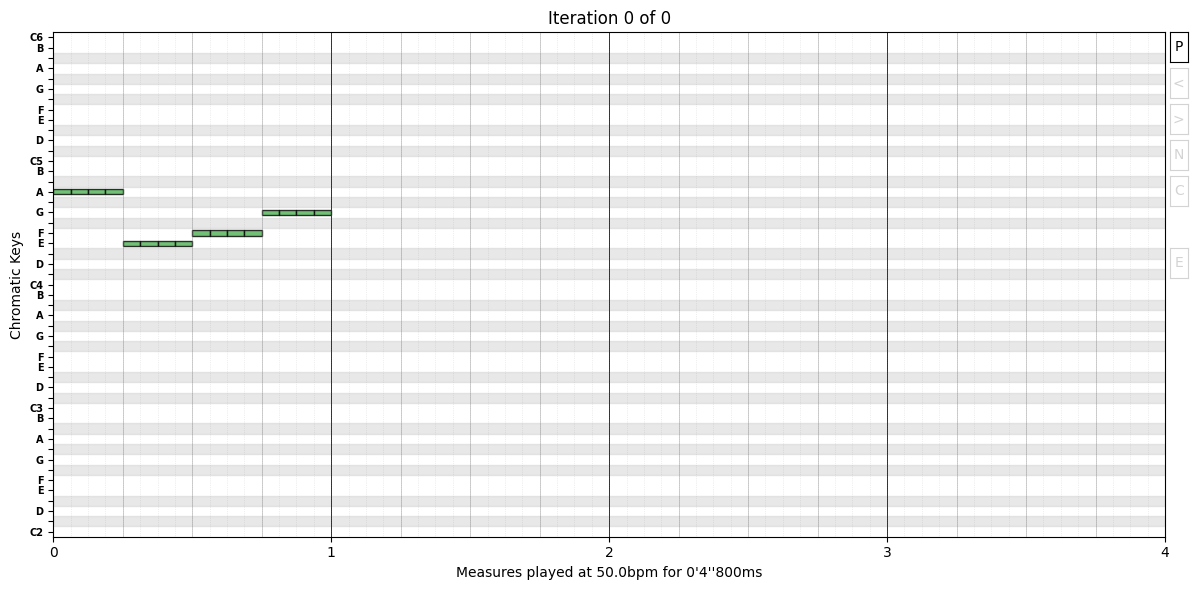

In [4]:
# Splits all notes by a duration of a single Step, equal to 1/4 of a Beat by default
treble_melody //= Steps(1)
treble_melody >> Plot()

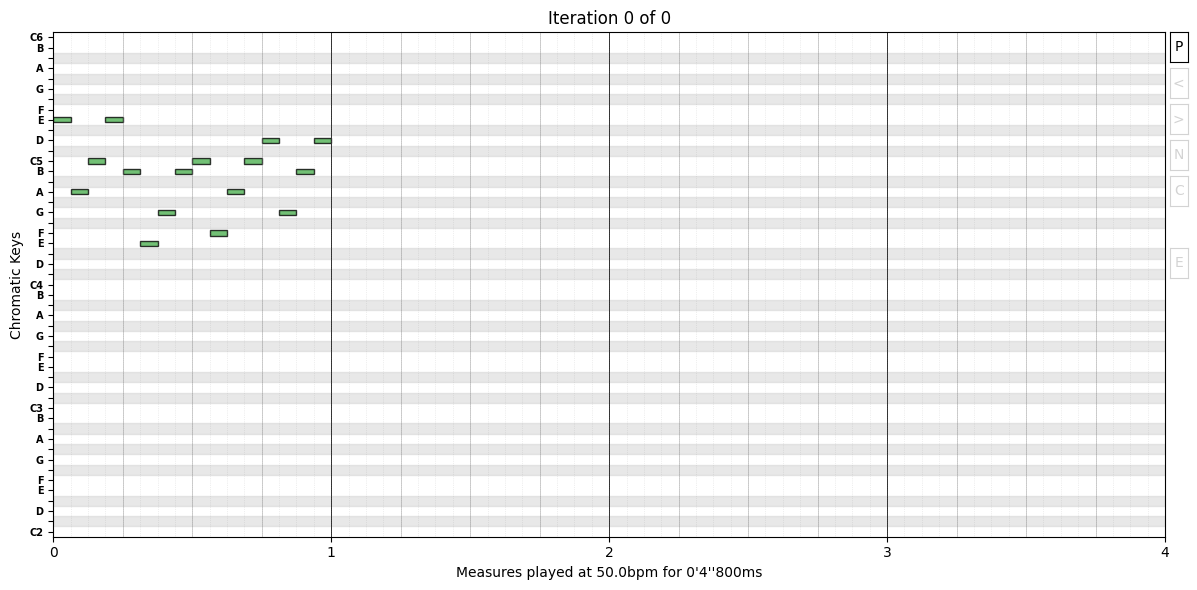

In [5]:
# Offsets the notes up the respective Degrees by multiples of 2
treble_melody += Foreach(2, 0, 1, 2)**Multiply(2)**Degree()
treble_melody >> Plot()

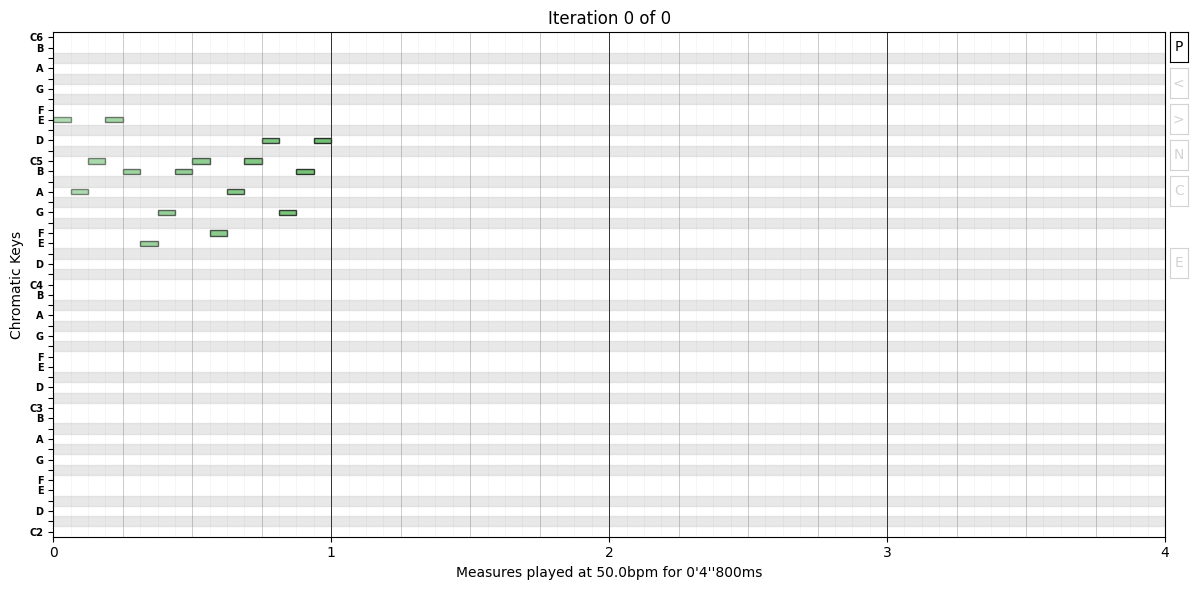

In [6]:
# Setting a Crescendo based on Step Position
treble_melody << Get(Step())**Multiply(3)**Add(55)**Velocity()
treble_melody >> Plot()

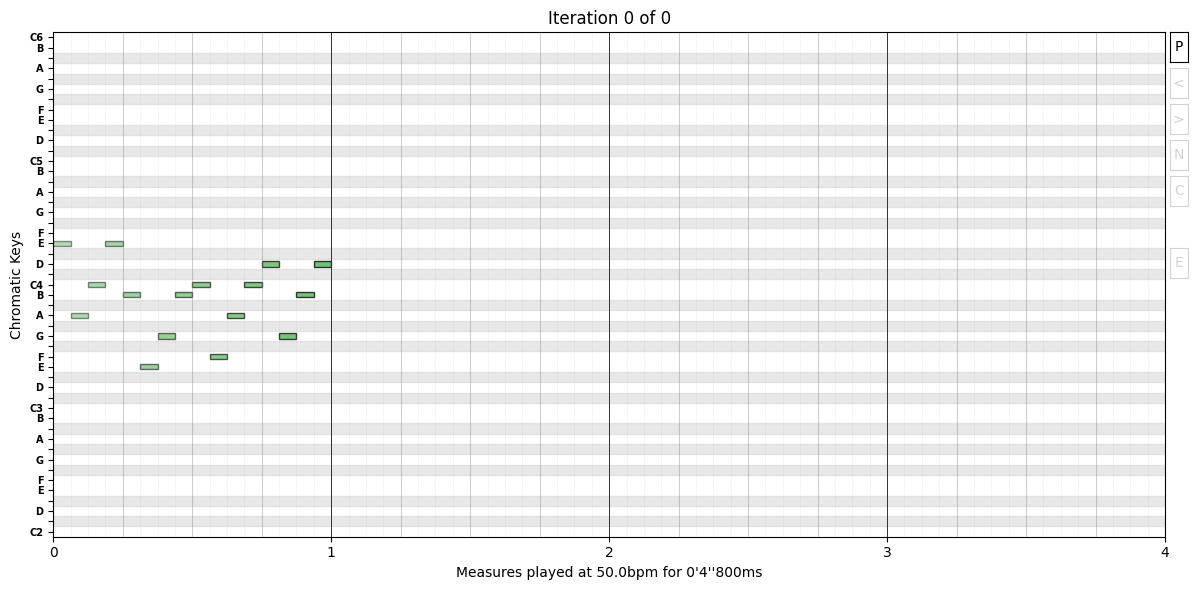

In [7]:
# Basic operations reult in implicit copies from left and right operands
bass_melody = treble_melody - Octave(1)
bass_melody >> Plot()

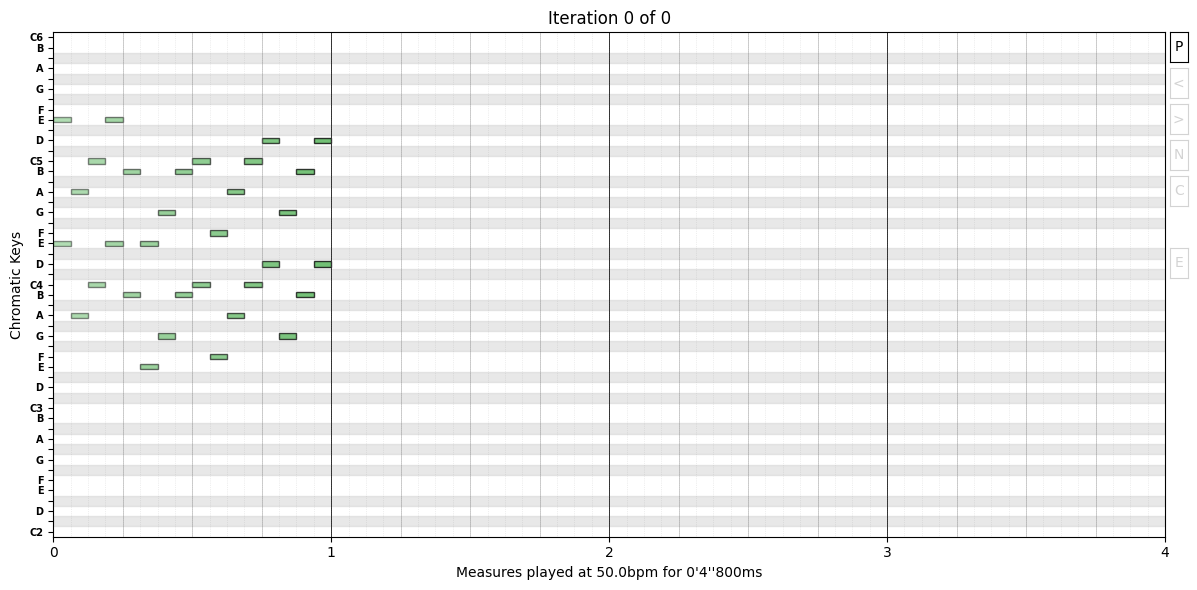

In [8]:
first_melody = treble_melody + bass_melody
first_melody >> Plot()

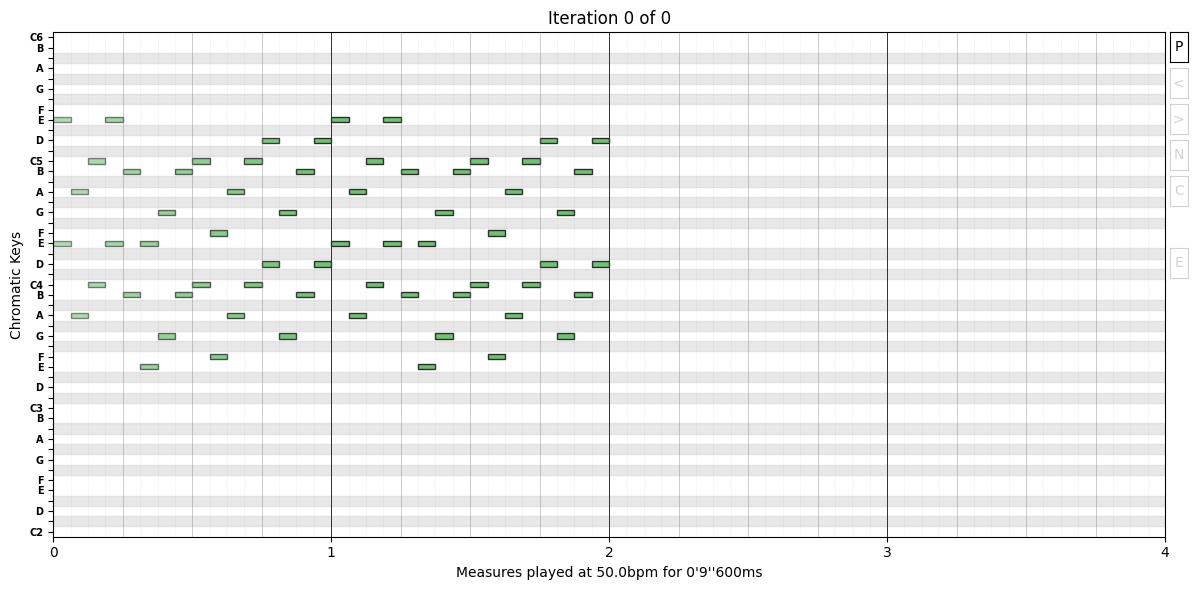

In [9]:
# Inline operations, like `=*`, preserve the left operand and do not result in any copy, except for the right operands
first_melody *= 2
first_melody << Equal(Measure(1))**Velocity( first_melody[Last()] )
first_melody >> Plot()

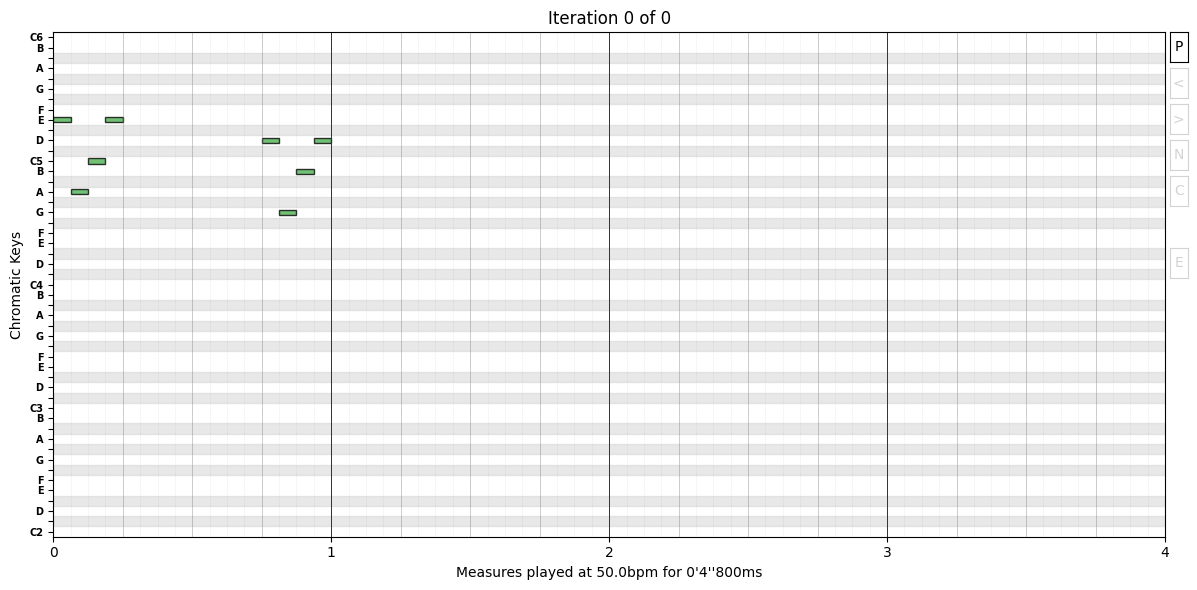

In [10]:
new_melody = treble_melody - treble_melody.mask(Or(Beat(1), Beat(2)))
new_melody << Velocity( treble_melody[Last()] ) >> Plot()

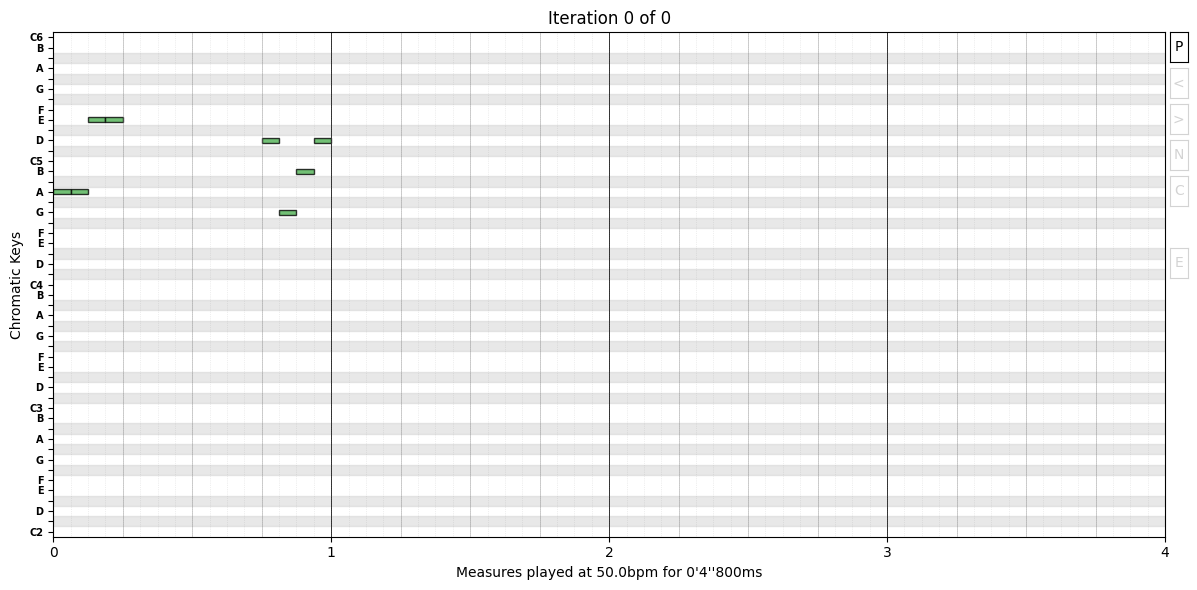

In [11]:
new_melody << Mux(2)**Cycle("A", "E")**RootKey() << Mux(2)**Cycle(4, 5)**Octave()
new_melody >> Plot()

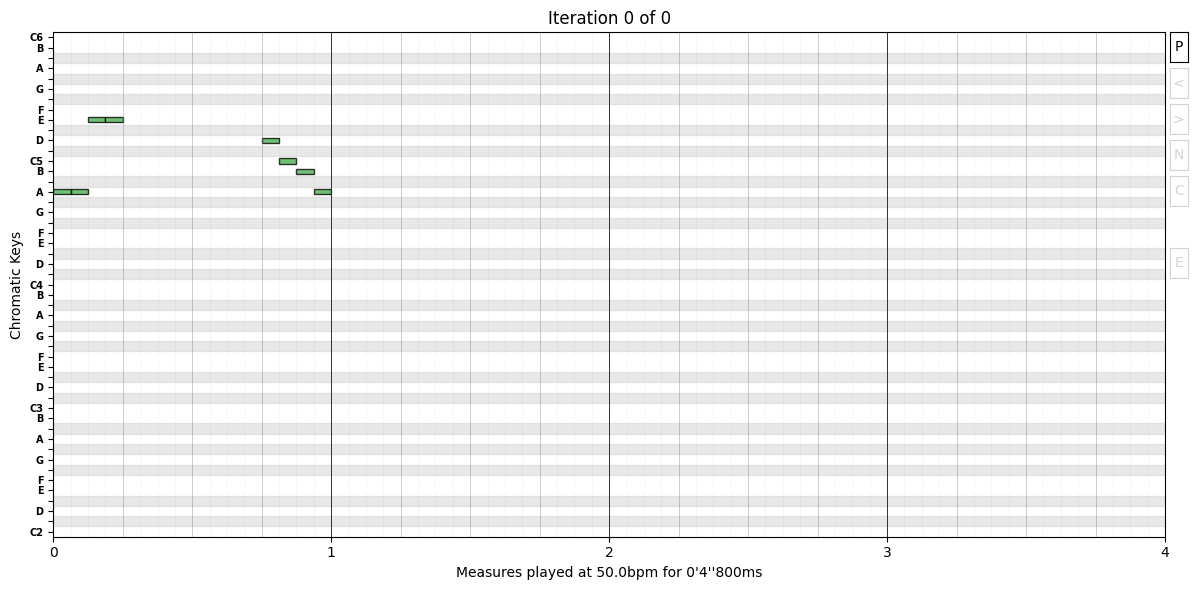

In [13]:
new_melody.mask(Beat(3)) << Previous()**Get(Pitch())**Subtract(1.0)
new_melody >> Plot()